In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# (1) Используя параметры pandas прочитать красиво пандас (подвох что заголовки - первые 2 линии)
df = pd.read_csv("default_of_credit_card_clients.csv",sep = ";", header = 1) #TODO

In [20]:
df.head().T

,0,1,2,3,4
ID,1,2,3,4,5
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,2,2,2,2,1
EDUCATION,2,2,2,2,2
MARRIAGE,1,2,2,1,1
AGE,24,26,34,37,57
PAY_0,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1
PAY_4,-1,0,0,0,0


In [23]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [5]:
#TODO
df[['LIMIT_BAL', 'PAY_0']].describe()

,LIMIT_BAL,PAY_0
count,30000.000000,30000.000000
mean,167484.322667,-0.016700
std,129747.661567,1.123802
min,10000.000000,-2.000000
25%,50000.000000,-1.000000
50%,140000.000000,0.000000
75%,240000.000000,0.000000
max,1000000.000000,8.000000


In [17]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
df['ID'][(df['SEX'] == 2) & (df['EDUCATION'] == 2)].count()
#TODO

8656

In [6]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
#TODO
df[[x for x in df.columns if "BILL_" in x or "PAY_" in x] + ["default payment next month"]].groupby("default payment next month").median()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default payment next month,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,23119.5,21660.5,20202.5,19000.0,17998.0,16679.0,2459.5,2247.5,2000.0,1734.0,1765.0,1706.0
1,1.0,0.0,0.0,0.0,0.0,0.0,20185.0,20300.5,19834.5,19119.5,18478.5,18028.5,1636.0,1533.5,1222.0,1000.0,1000.0,1000.0


In [14]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

df.pivot_table(values='ID', index=['MARRIAGE', 'SEX'], columns=['EDUCATION'], aggfunc='count')


EDUCATION       0       1       2       3     4      5     6
MARRIAGE SEX                                                
0        1    NaN     1.0     1.0    12.0   NaN    NaN   NaN
         2    NaN     3.0     5.0    32.0   NaN    NaN   NaN
1        1    2.0  1690.0  2370.0  1048.0  18.0   48.0  14.0
         2    2.0  2032.0  4472.0  1813.0  34.0  102.0  14.0
2        1    6.0  2633.0  2940.0   894.0  23.0   46.0  11.0
         2    4.0  4176.0  4080.0  1015.0  45.0   81.0  10.0
3        1    NaN    30.0    63.0    36.0   1.0    1.0   NaN
         2    NaN    20.0    99.0    67.0   2.0    2.0   2.0

In [36]:
# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700SE
def get_description(LIMIT_BAL):
    return {
            LIMIT_BAL <= 10000:   'A',
   10000  < LIMIT_BAL <= 100000:  'B',
   100000 < LIMIT_BAL <= 200000:  'C',
   200000 < LIMIT_BAL <= 400000:  'D',
   400000 < LIMIT_BAL <= 700000:  'E',
   700000 < LIMIT_BAL:            'F'
    }[True]

#TODO
df['LIMIT_BAL_DESC'] = df['LIMIT_BAL'].map(get_description)
df[['LIMIT_BAL', 'LIMIT_BAL_DESC']].head()

,LIMIT_BAL,LIMIT_BAL_DESC
0,20000,B
1,120000,C
2,90000,B
3,50000,B
4,50000,B


In [ ]:
df = df.drop(['LIMIT_BAL_DESC'], axis = 1)

In [4]:
%matplotlib inline

In [5]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)


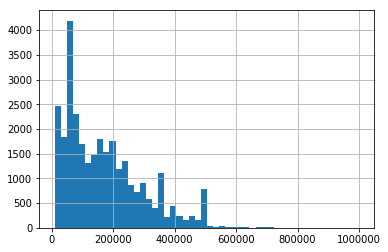

In [6]:
df[~df['LIMIT_BAL'].isnull()]['LIMIT_BAL'].hist(bins=50)

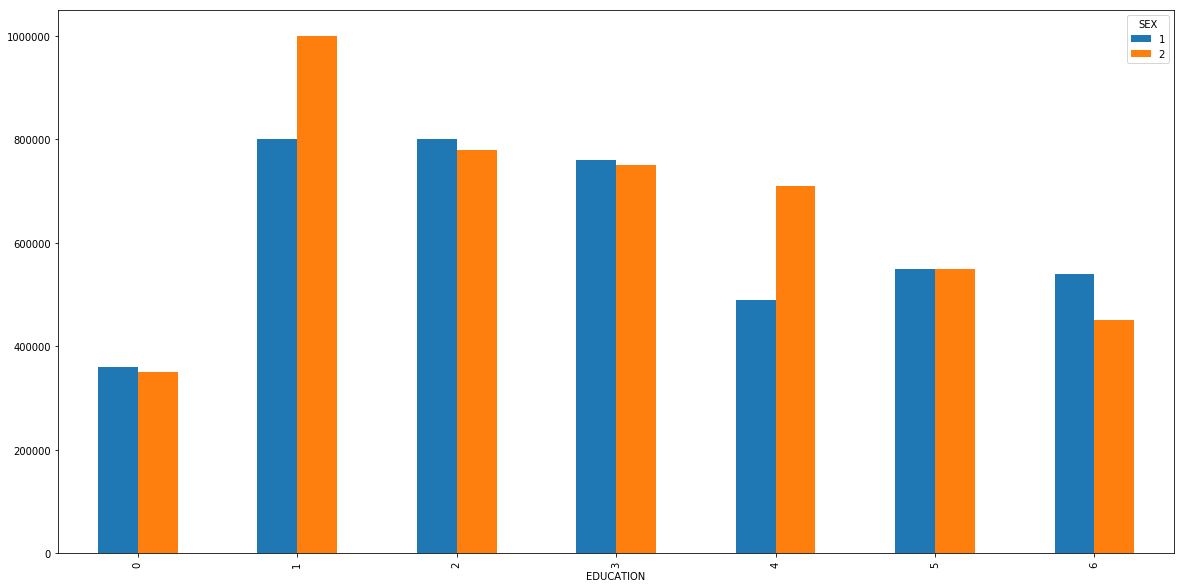

In [7]:
# (8) построить зависимость кредитного лимита от образования для каждого пола
# график необходимо сделать очень широким (на весь экран)
fig, ax = plt.subplots(figsize=(20,10))
df.pivot_table('LIMIT_BAL', 'EDUCATION', 'SEX', 'max').plot(kind='bar', ax=ax)

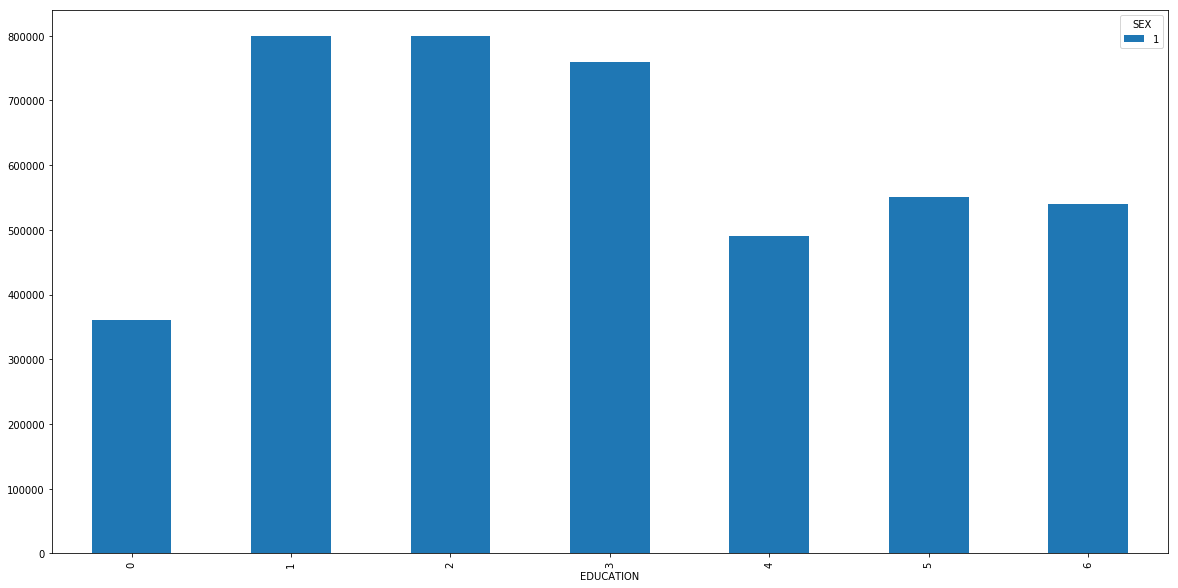

In [30]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов

#TODO
fig, ax = plt.subplots(figsize=(20,10))
df[df['SEX'] == 1].pivot_table('LIMIT_BAL', 'EDUCATION', 'SEX', 'max').plot(kind='bar', ax=ax)

In [8]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
df_1 = df.drop([x for x in df.columns if "BILL_" in x or "PAY_" in x], axis=1) 
df_1.head()
#TODO

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default payment next month
0,1,20000,2,2,1,24,1
1,2,120000,2,2,2,26,1
2,3,90000,2,2,2,34,0
3,4,50000,2,2,1,37,0
4,5,50000,1,2,1,57,0


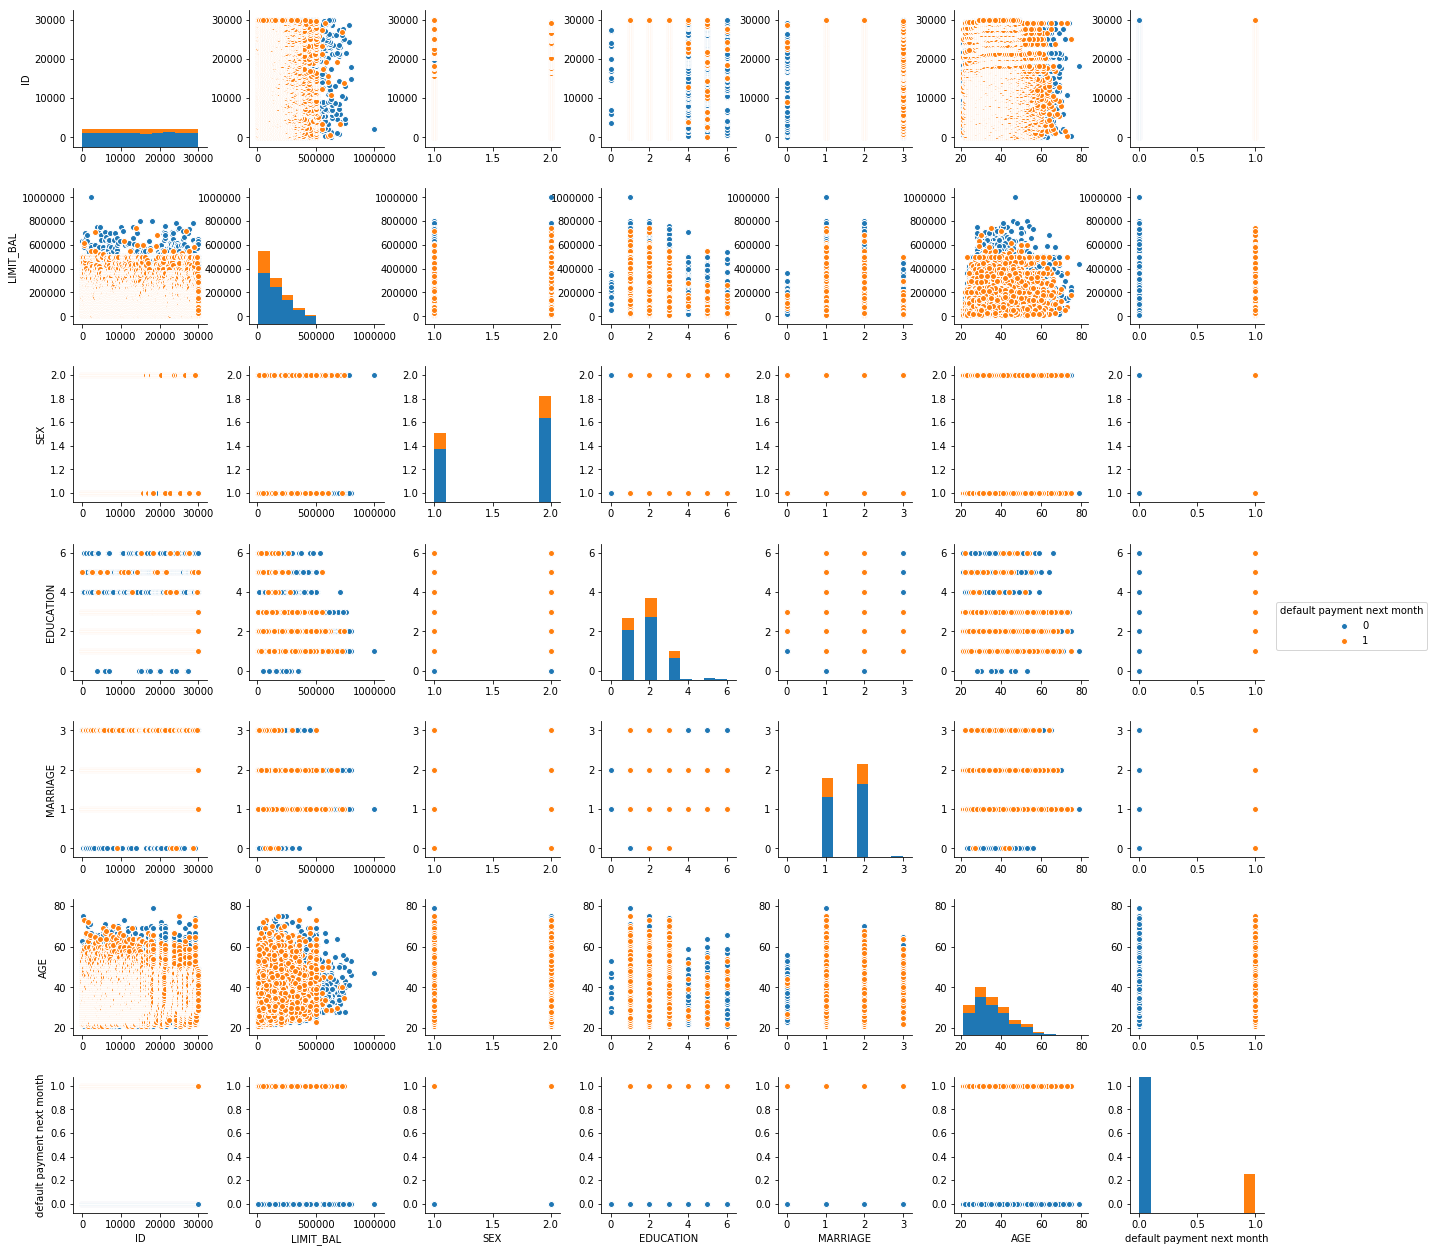

In [9]:
#
sns.pairplot(df_1, hue='default payment next month')


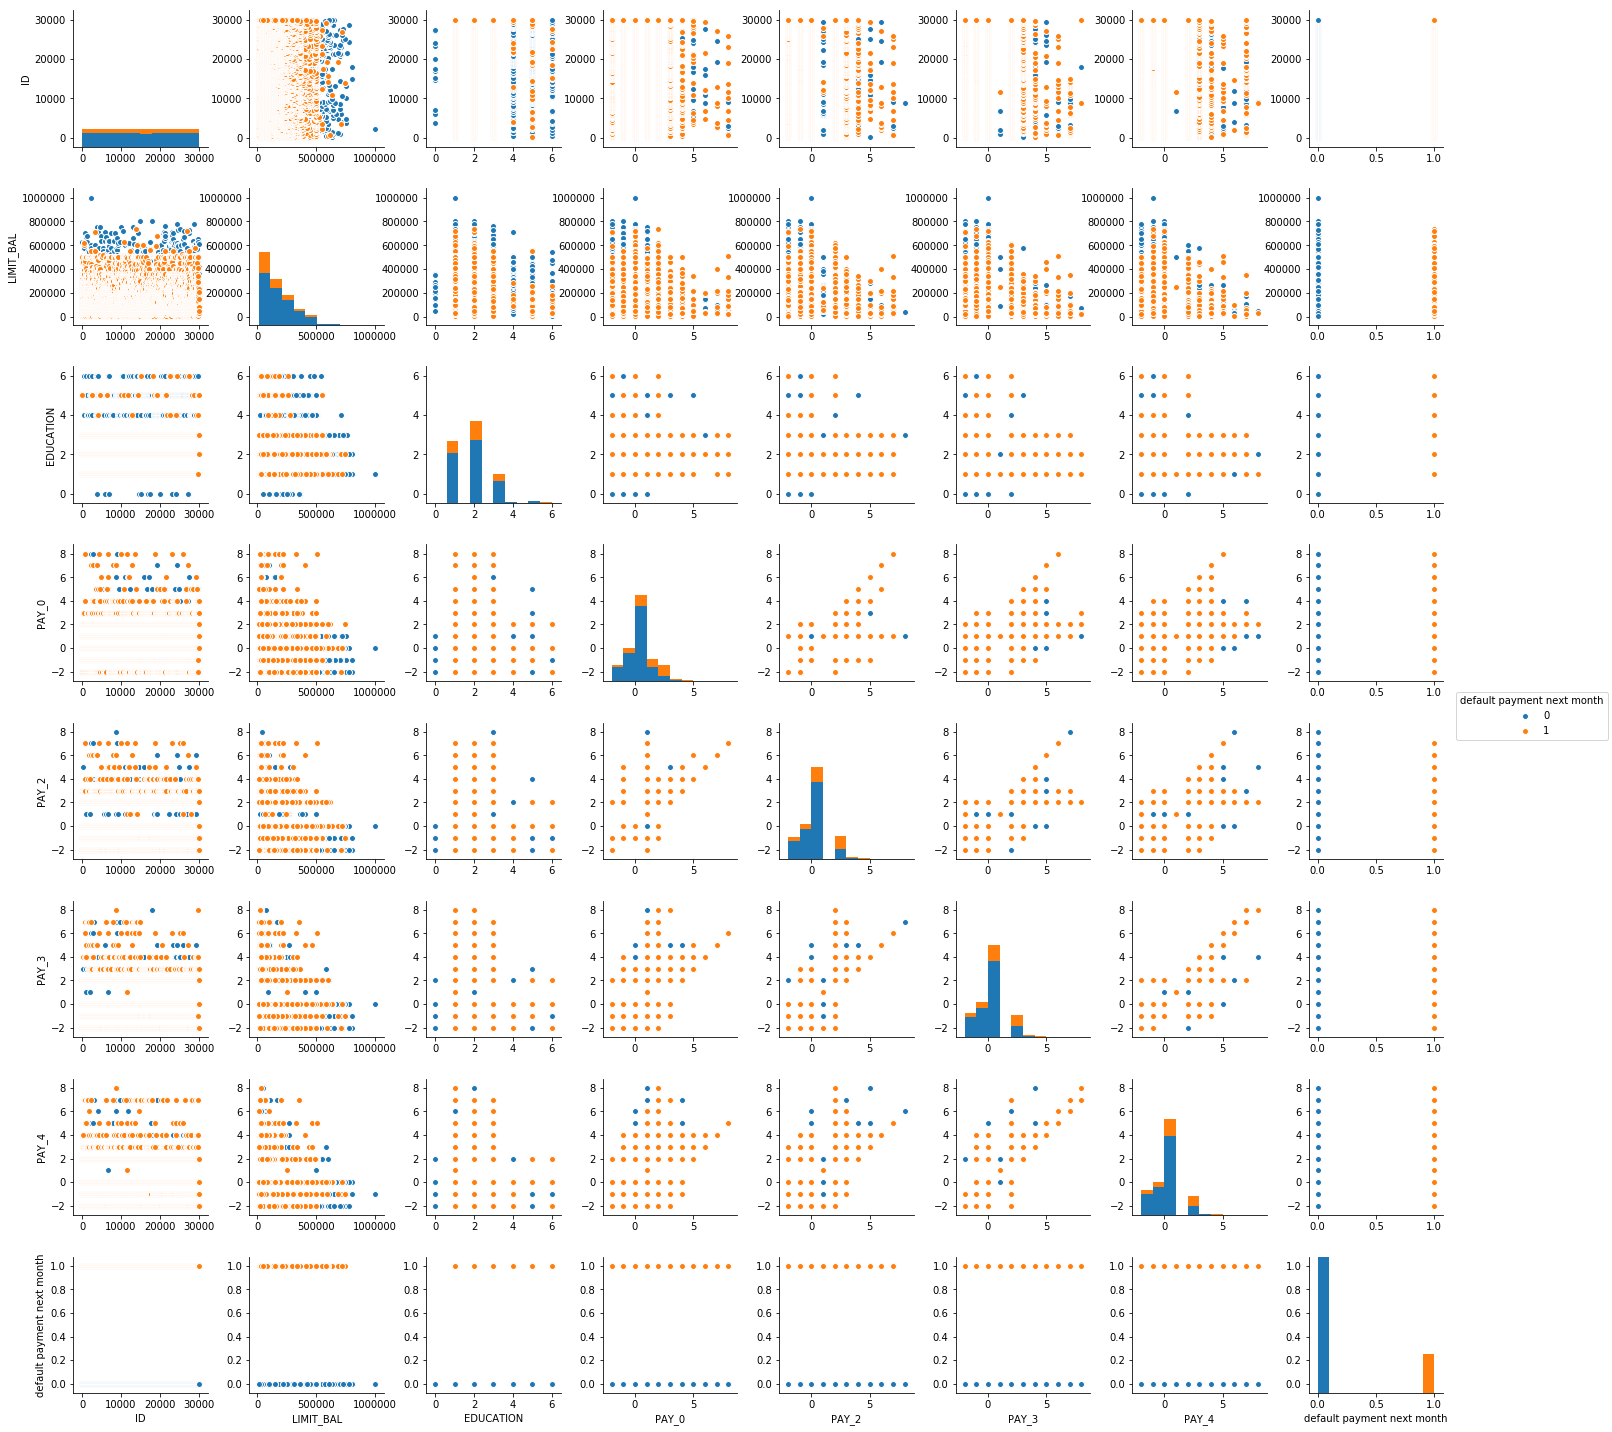

In [19]:
df_2 = df[['ID', 'LIMIT_BAL', 'EDUCATION'] + ['PAY_0'] + ["PAY_" + str(x) for x in range(2,5)] + ['default payment next month']]
df_2.head()
sns.pairplot(df_2, hue='default payment next month')

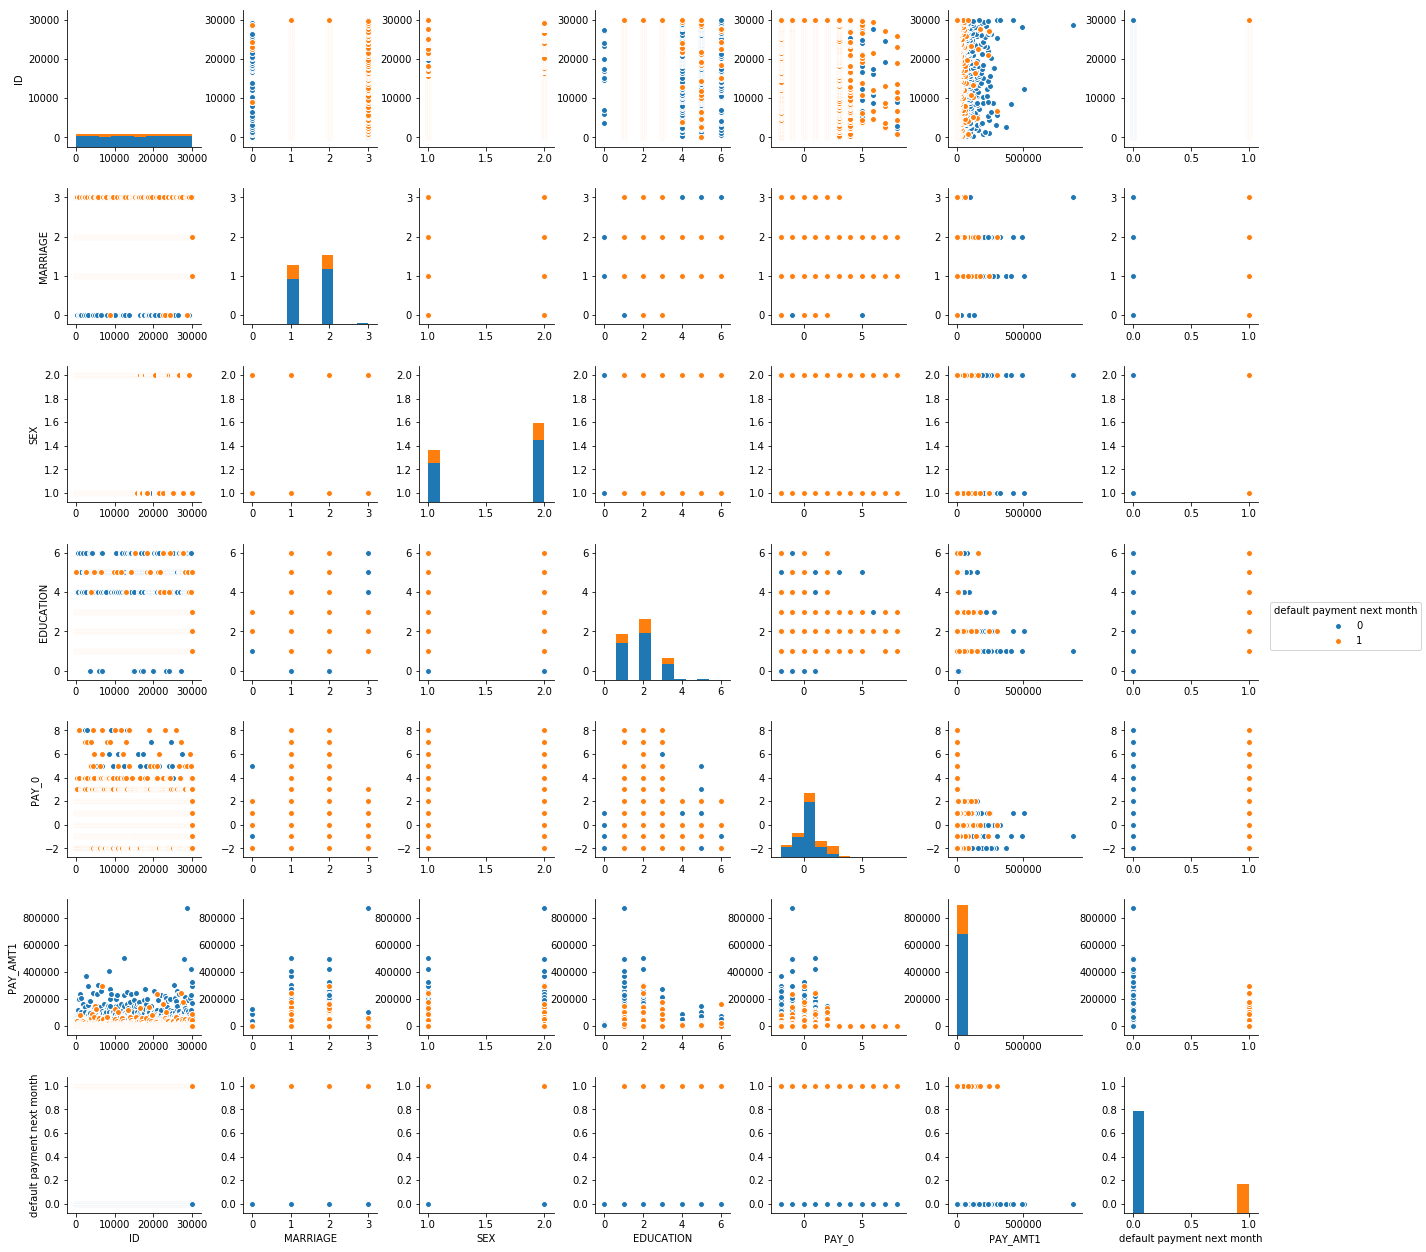

In [22]:
df_3 = df[['ID', 'MARRIAGE', 'SEX', 'EDUCATION', 'PAY_0', 'PAY_AMT1', 'default payment next month']]

sns.pairplot(df_3, hue='default payment next month')

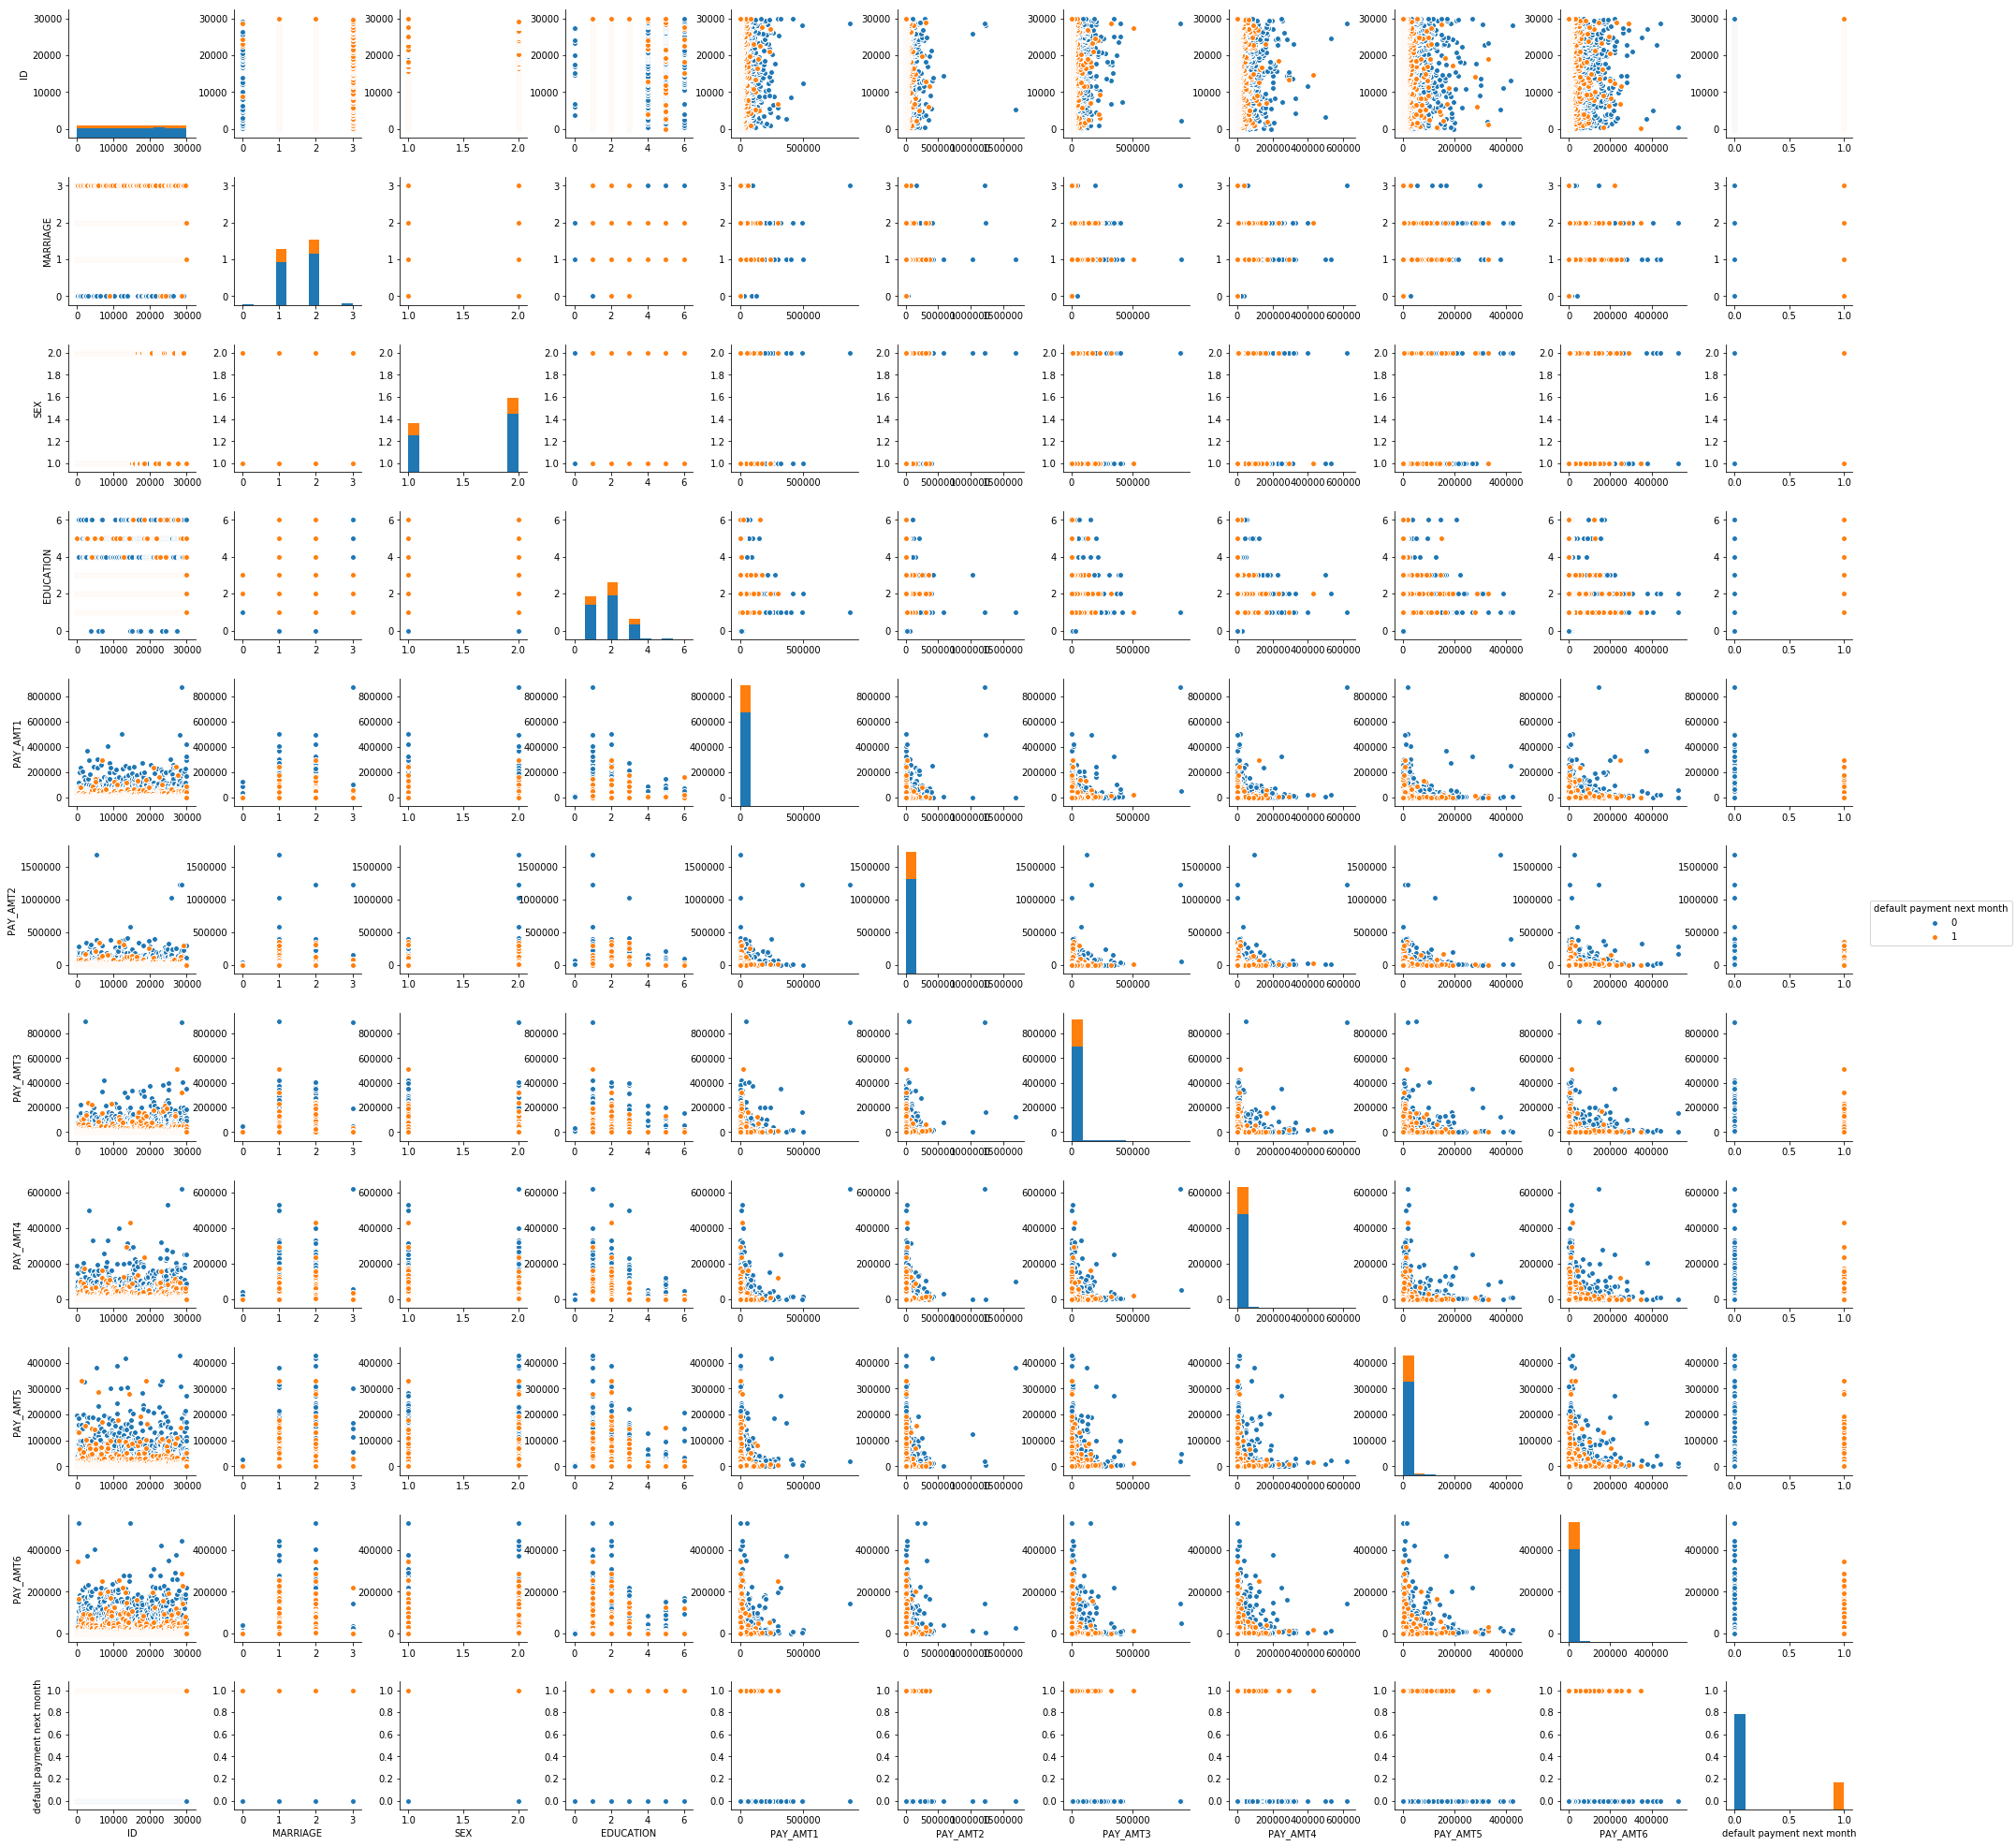

In [24]:
df_3 = df[['ID', 'MARRIAGE', 'SEX', 'EDUCATION'] + ['PAY_AMT' + str(x) for x in range(1,7)] + ['default payment next month']]

sns.pairplot(df_3, hue='default payment next month')